In [1]:
pip install numpy pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("C://Users\ketul\OneDrive\Documents\Social_Network_Ads.csv")
print(df.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [7]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[74  5]
 [11 30]]


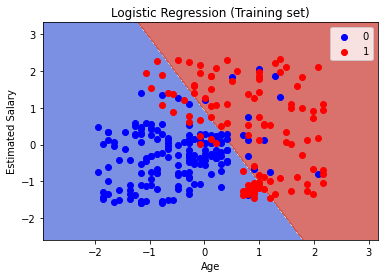

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = 'coolwarm')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['blue', 'red'][i], cmap = 'coolwarm', label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [9]:
# Predict class labels for the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Compute the true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute accuracy, error rate, precision, and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
error_rate = (FP + FN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print('Accuracy:', accuracy)
print('Error rate:', error_rate)
print('Precision:', precision)
print('Recall:', recall)


Confusion matrix:
[[74  5]
 [11 30]]
Accuracy: 0.8666666666666667
Error rate: 0.13333333333333333
Precision: 0.8571428571428571
Recall: 0.7317073170731707
